In [171]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

In [175]:
# Load
with open('years.pkl', 'rb') as y, open("cites.pkl", 'rb') as c:
    X = np.asarray(pickle.load(y))
    y = np.asarray(pickle.load(c))
    
    # Remove small lists
    idx = np.where(np.asarray([len(x) for x in X]) > 6)[0]
    X = X[idx]
    y = y[idx]
    
    y = y[0:1000]
    X = X[0:1000]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 95., 87., 88., 86., 69., 88.,
        64., 40., 64., 60., 48., 30., 26., 23., 26., 15., 12., 16., 10.,
        10., 12.,  8.,  3.,  4.,  3.,  1.,  2.,  3.,  1.,  0.,  3.,  1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 39 Patch objects>)

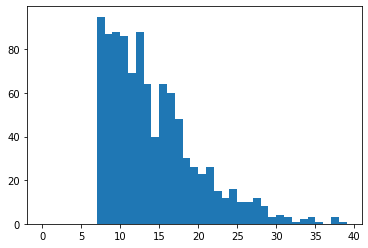

In [176]:
plt.hist([len(x) for x in X], bins=np.arange(40))

In [198]:
# Preprocess shape
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

y_normed = [np.asarray(cites) / max(cites) for cites in y]
y_preproc = [moving_average(cites) for cites in y_normed]

In [180]:
y_ts = to_time_series_dataset(y_normed)
years = np.arange(np.min(np.concatenate(X)), np.max(np.concatenate(X))+1)

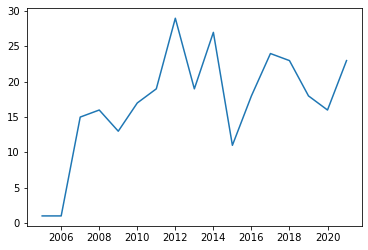

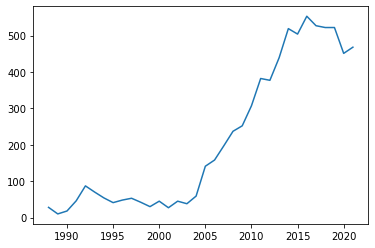

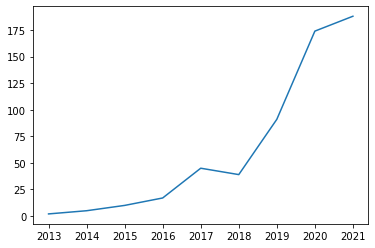

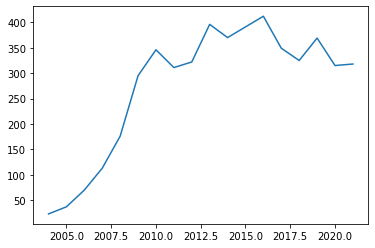

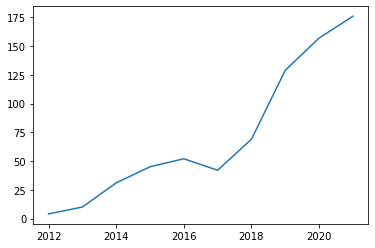

In [181]:
for i in range(5):
    plt.plot(X[i], y[i])
    plt.show()

In [186]:
model = TimeSeriesKMeans(n_clusters=9, metric='dtw', max_iter=20, n_jobs=-2)
model.fit(y_ts)

TimeSeriesKMeans(max_iter=20, metric='dtw', n_clusters=9, n_jobs=-2)

## Plot

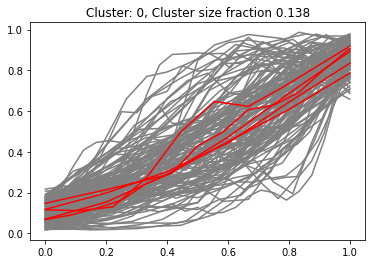

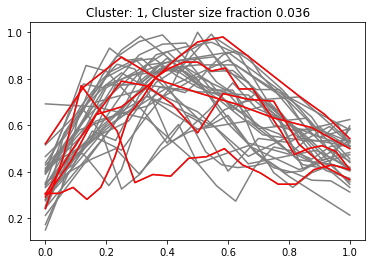

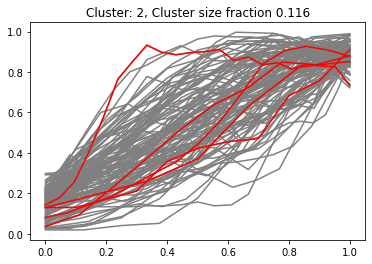

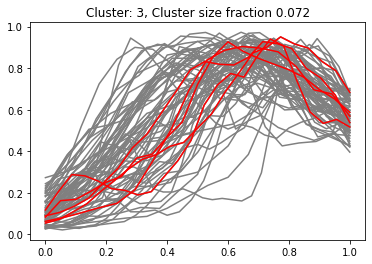

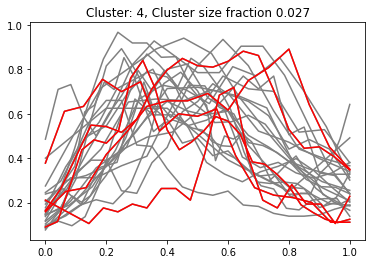

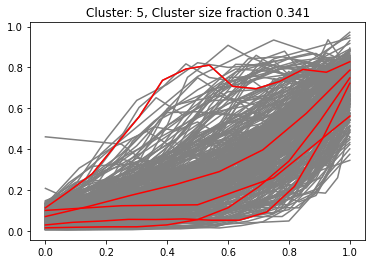

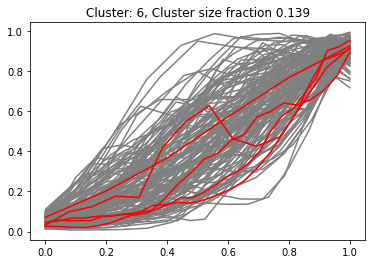

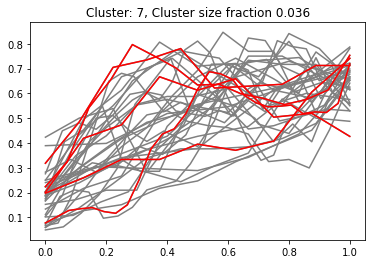

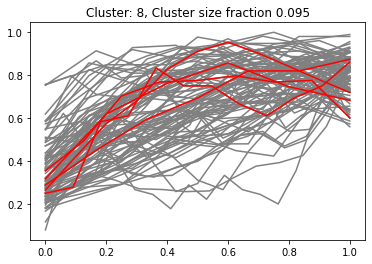

In [187]:
for label in np.unique(model.labels_):
    idx = np.where(model.labels_ == label)[0]
    
    for i in idx:
        ts = y_normed[i]
        plt.plot(np.linspace(0, 1, len(ts)), ts, color='gray')
    
    sub_idx = np.random.choice(idx, 5)
    for i in sub_idx:
        ts = y_normed[i]
        plt.plot(np.linspace(0, 1, len(ts)), ts, color='red')
    plt.title(f'Cluster: {label}, Cluster size fraction {len(idx) / len(model.labels_):.3f}')
    plt.show()

## no dtw

In [199]:
maxLength = max(len(x) for x in X)
processed_y = []
processed_X = []
for i in range(len(y)):
    interpolated_X = np.linspace(0, 1, maxLength)
    processed_X.append(interpolated_X)
    interpolated_y = []
    processed_y.append(np.interp(interpolated_X, np.linspace(0, 1, len(y_preproc[i])), y_preproc[i]))

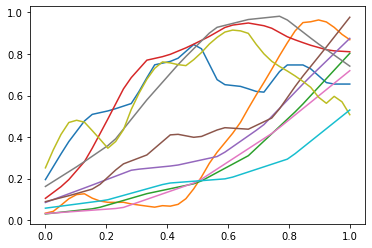

In [200]:
for i in range(10):
    plt.plot(np.linspace(0, 1, maxLength), processed_y[i])
plt.show()

In [201]:
y_ts = to_time_series_dataset(processed_y)

In [202]:
model = TimeSeriesKMeans(n_clusters=9, metric='euclidean', max_iter=20, n_jobs=-2)
model.fit(y_ts)

TimeSeriesKMeans(max_iter=20, n_clusters=9, n_jobs=-2)

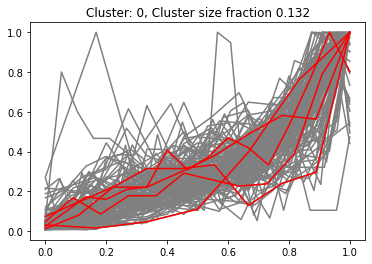

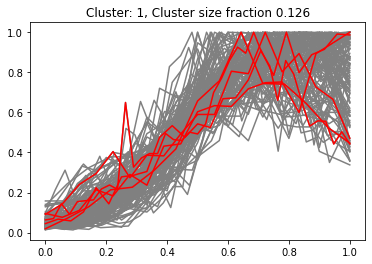

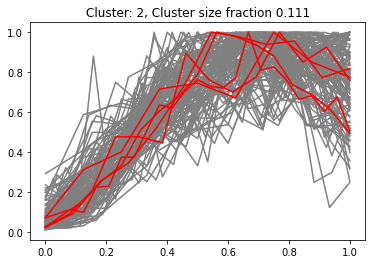

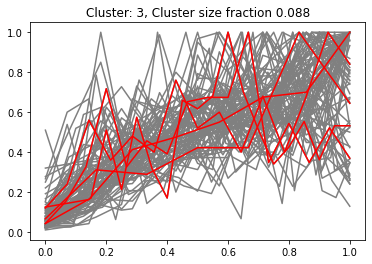

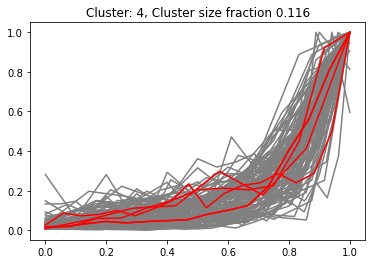

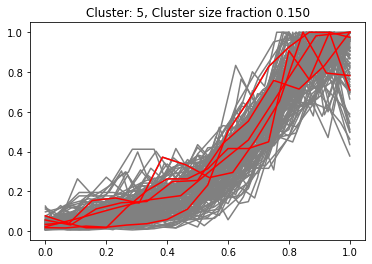

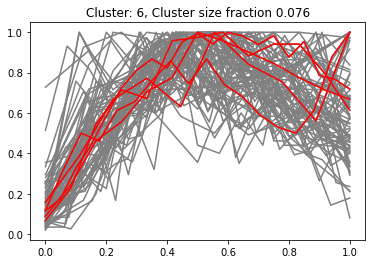

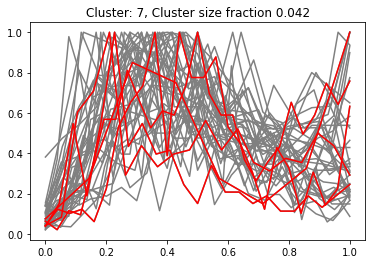

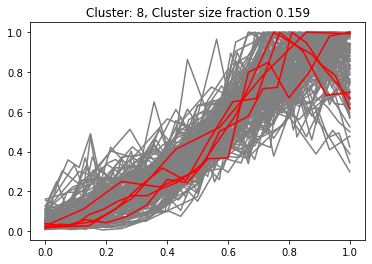

In [203]:
for label in np.unique(model.labels_):
    idx = np.where(model.labels_ == label)[0]
    
    for i in idx:
        ts = y_normed[i]
        plt.plot(np.linspace(0, 1, len(ts)), ts, color='gray')
    
    sub_idx = np.random.choice(idx, 5)
    for i in sub_idx:
        ts = y_normed[i]
        plt.plot(np.linspace(0, 1, len(ts)), ts, color='red')
    plt.title(f'Cluster: {label}, Cluster size fraction {len(idx) / len(model.labels_):.3f}')
    plt.show()